In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

In [22]:
df_power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
df_power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [23]:
df_power.shape

(4383, 5)

In [24]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [25]:
# Merubah tipe data pada kolom Date dari tipe data object ke tipe data datetime
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [26]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [36]:
df_power = df_power.set_index('Date')
df_power.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [37]:
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Hari'] = df_power.index.day_name()

In [38]:
df_power.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Hari
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [39]:
df_power

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Hari
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

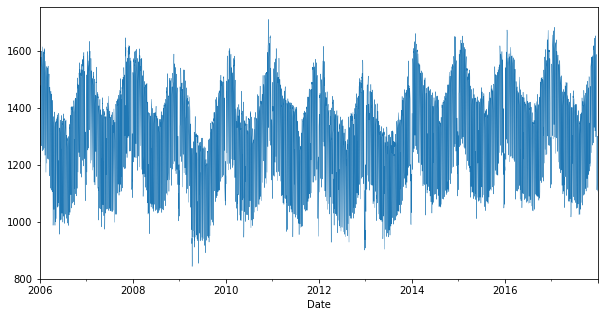

In [41]:
plt.figure(figsize=(10,5))
df_power['Consumption'].plot(linewidth=0.4)

In [42]:
import plotly.express as px
fig = px.line(df_power, x=df_power.index, y=df_power['Consumption'])
fig.show()

Text(0, 0.5, 'Daily Consumption (GWh)')

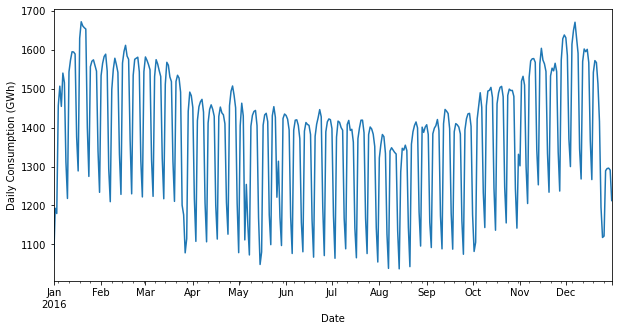

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

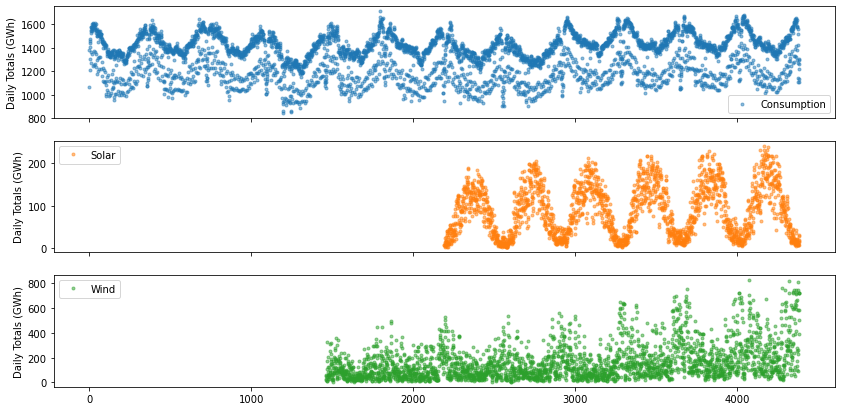

In [35]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Text(0, 0.5, 'Daily Consumption GWH')

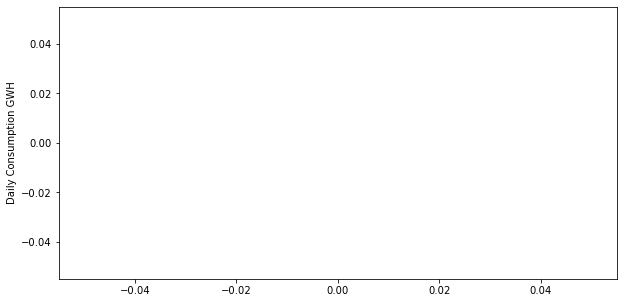

In [12]:
plt.figure(figsize=(10,5))
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption GWH')

In [ ]:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption']
axx = pd.DataFrame(ax)
fig = px.line(axx, y=axx['Consumption'])
fig.show()

In [1]:
# fig = px.line(x=df_power.loc['2016-12'].index, y=df_power.loc['2016-12']['Consumption'], markers=True)
# fig.show()

In [ ]:
# fig = px.line(x=df_power.loc['2016-12'].index, y=df_power.loc['2016-12']['Consumption'], 
#               markers=True, text=df_power.loc['2016-12']['Hari'])
fig = px.line(df_power.loc['2016-12'], x=df_power.loc['2016-12'].index, y='Consumption', 
              markers=True, text='Hari')
fig.show()

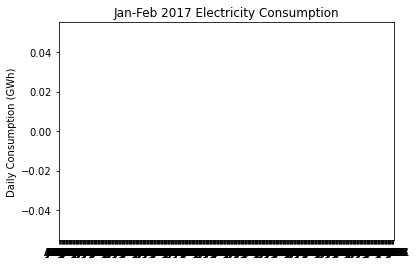

In [13]:
# Import dates module from matplotlib
import matplotlib.dates as mdates

# Plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-02','Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8,7), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel(' ')

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8,7), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df_power.loc['2012':'2016'], x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel(' ')

# By : Hari

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_power, x='Hari', y='Consumption')

# Resampling time series data

In [45]:
# Merata-ratakan per minggunya (1 index = 1 minggu)
columns = ['Consumption', 'Wind','Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.tail(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-29,1419.077067,485.735571,44.344857,530.080429
2017-11-05,1326.164499,300.840286,49.796857,350.637143
2017-11-12,1472.113604,273.502143,21.129000,294.631143
2017-11-19,1491.885550,329.920000,28.595143,358.515143
2017-11-26,1488.566089,452.703286,25.847857,478.551143
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571


In [46]:
# # Merata-ratakan per Q(kuartal)
# columns = ['Consumption', 'Wind','Solar', 'Wind+Solar']

# power_weekly_mean = df_power[columns].resample('Q').mean()
# power_weekly_mean.tail(10)

In [47]:
start, end = '2016-01', '2016-06'

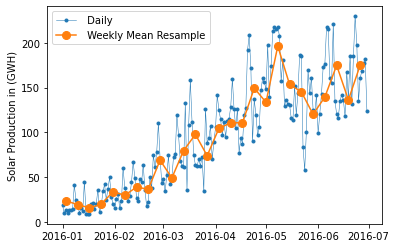

In [48]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'], marker = '.', linestyle = '-', linewidth=0.5, label = ' Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'], marker = 'o', markersize = 8, linestyle = '-', label = ' Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWH)')
ax.legend();

In [49]:
start, end = '2015-01', '2016-12'

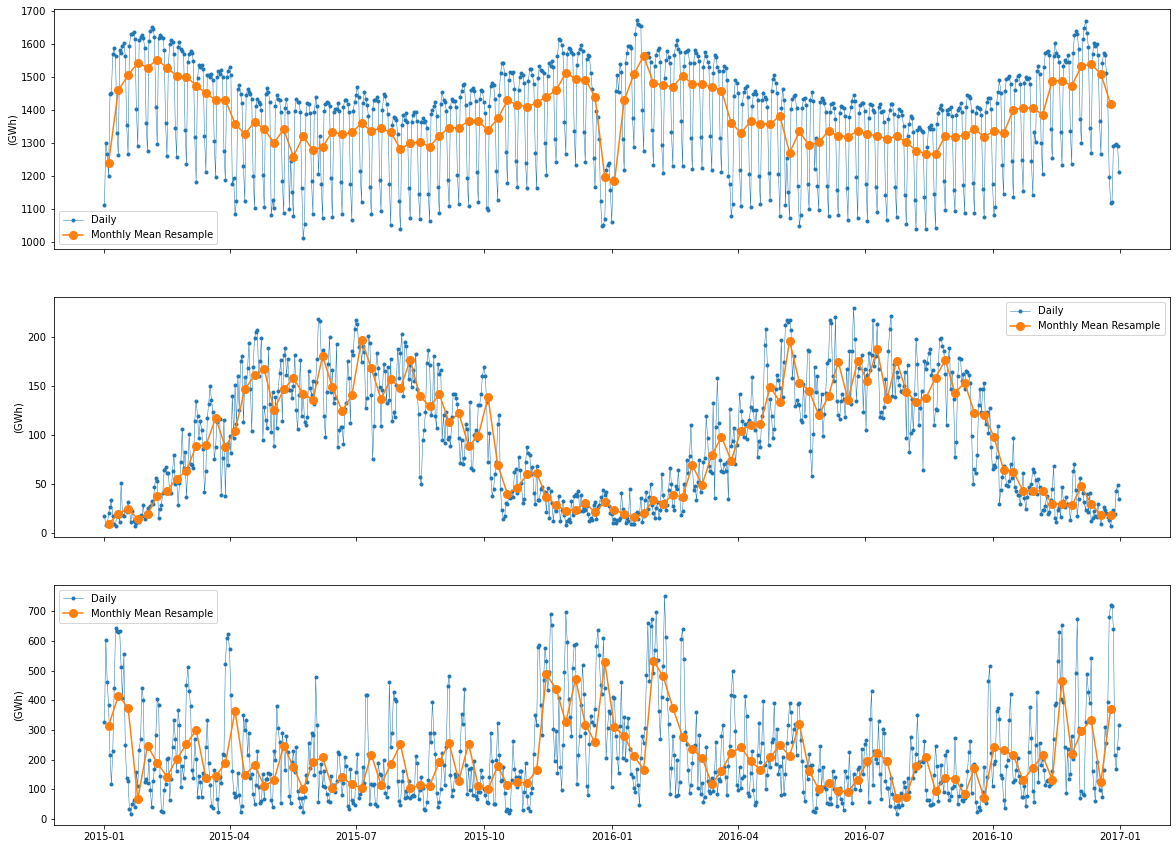

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    ax.plot(df_power.loc[start:end, name], marker='.', linestyle='-', linewidth=0.5, label='Daily')
    ax.plot(power_weekly_mean.loc[start:end, name], marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
    ax.set_ylabel('(GWh)')
    ax.legend();
    if ax != axes[-1]:
        ax.set_xlabel(' ')

In [51]:
!pip install --upgrade pandas-datareader

In [52]:
from pandas_datareader import data

In [53]:
goog = data.DataReader('GOOG', start='2012', end='2022', data_source='yahoo')

In [54]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,16.641375,16.248346,16.262545,16.573130,147611217.0,16.573130
2012-01-04,16.693678,16.453827,16.563665,16.644611,114989399.0,16.644611
2012-01-05,16.537264,16.344486,16.491436,16.413727,131808205.0,16.413727
2012-01-06,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817
2012-01-09,16.114599,15.472754,16.102144,15.503389,233776981.0,15.503389


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn ; seaborn.set()

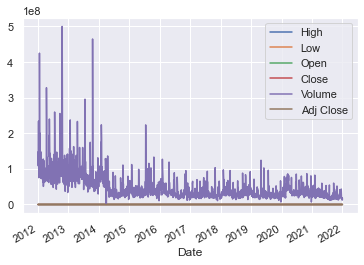

In [56]:
goog.plot();

# Bagaimana perkembangan harga saham google tiap tahun?

In [57]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [58]:
goog.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [59]:
goog['year'] = goog.index.year

In [60]:
goog

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2012-01-03,16.641375,16.248346,16.262545,16.573130,147611217.0,16.573130,2012
2012-01-04,16.693678,16.453827,16.563665,16.644611,114989399.0,16.644611,2012
2012-01-05,16.537264,16.344486,16.491436,16.413727,131808205.0,16.413727,2012
2012-01-06,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817,2012
2012-01-09,16.114599,15.472754,16.102144,15.503389,233776981.0,15.503389,2012
...,...,...,...,...,...,...,...
2021-12-27,148.426498,147.250000,147.463501,148.063995,13256000.0,148.063995,2021
2021-12-28,148.374496,145.935501,148.374496,146.447998,18624000.0,146.447998,2021
2021-12-29,147.183746,145.504501,146.429504,146.504501,17022000.0,146.504501,2021


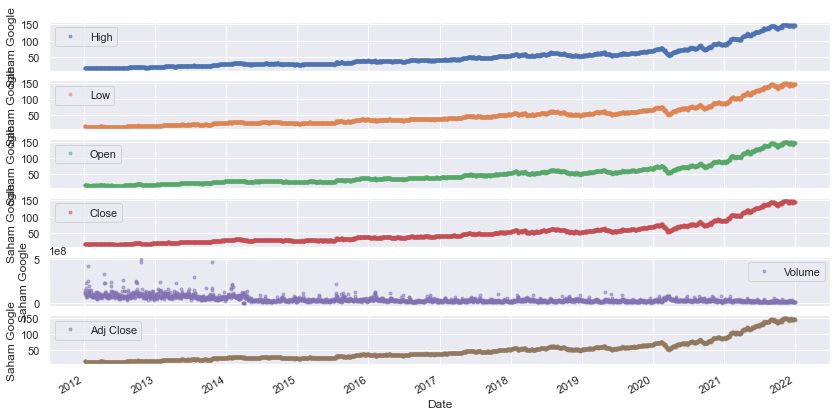

In [61]:
# df.groupby('')
cols_to_plot = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
axes = goog[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,7), subplots=True)
for ax in axes:
    ax.set_ylabel('Saham Google')

<AxesSubplot:xlabel='year', ylabel='Close'>

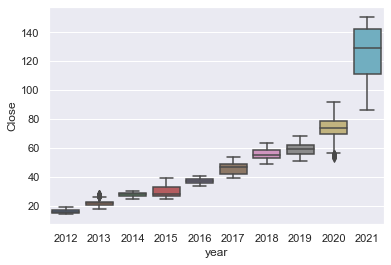

In [62]:
sns.boxplot(x=goog['year'], y=goog['Close'])

<AxesSubplot:ylabel='Date'>

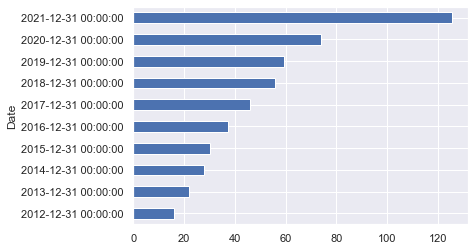

In [63]:
goog.Close.resample('Y').mean().plot(kind='barh')

# Resampling and converting frequency

Menggunakan metode resample() atau asfreq()
Perbedaan keduanya yaitu resample() pada dasarnya adalah pengumpulan data, sedangkan asfreq() adalah pemilihan data.

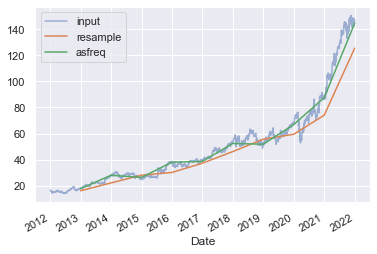

In [64]:
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BA').mean().plot(style='-')
goog['Close'].asfreq('BA').plot(style='-')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

In [65]:
goog['Close'].resample('BA').mean() #pengumpulan data berdasarkan Busniness Annual (Akhir tahun penutupan bisnis)

Date
2012-12-31     16.010401
2013-12-31     22.023519
2014-12-31     27.990164
2015-12-31     30.100284
2016-12-30     37.174335
2017-12-29     46.089042
2018-12-31     55.661257
2019-12-31     59.419653
2020-12-31     74.070191
2021-12-31    125.530687
2022-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64

In [66]:
goog['Close'].asfreq('BA') #pemilihan data ditanggal tersebut

Date
2012-12-31     17.618462
2013-12-31     27.913124
2014-12-31     26.247936
2015-12-31     37.944000
2016-12-30     38.591000
2017-12-29     52.320000
2018-12-31     51.780499
2019-12-31     66.850998
2020-12-31     87.594002
2021-12-31    144.679504
Freq: BA-DEC, Name: Close, dtype: float64

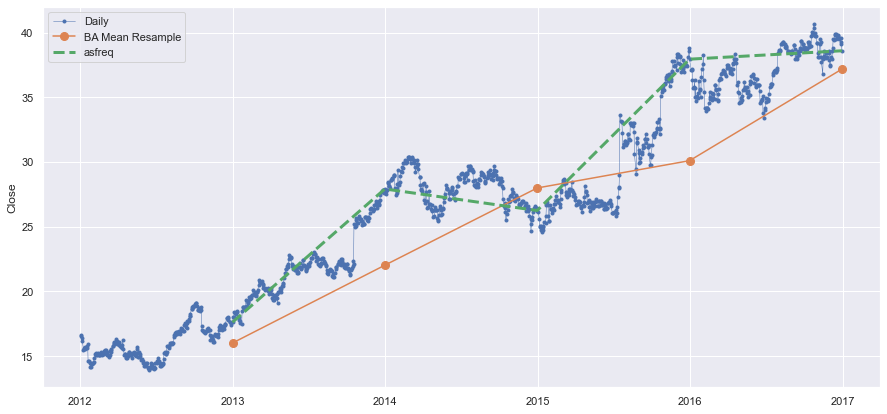

In [67]:
start, end = '2010-01', '2016-12'

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(goog['Close'].loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(goog['Close'].resample('BA').mean().loc[start:end], marker='o', markersize=8, linestyle='-', label='BA Mean Resample')
ax.plot(goog['Close'].asfreq('BA').loc[start:end], linestyle='--', label='asfreq', linewidth=3)
ax.set_ylabel('Close')
ax.legend();

Perhatikan perbedaanya: pada setiap poin, resample melaporkan rata-rata tahun sebelumnya, sedangkan asfreq melaporkan nilai pada akhir tahun.

Untuk up-sampling, resample() dan asfreq() sebagian besar setara, meskipun resample memiliki lebih banyak opsi yang tersedia. Dalam hal ini, default untuk kedua metode adalah membiarkan titik up-sample kosong, yaitu diisi dengan nilai NA. Sama seperti fungsi pd.filla() yang dibahas sebelumnya, asfreq() menerima argumen method untuk menentukan bagaimana nilai diperhitungkan. Di sini, kami akan mengambil sampel ulang data hari kerja dengan frekuensi harian (yaitu, termasuk akhir pekan):

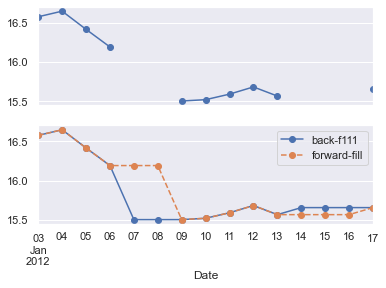

In [68]:
fig, ax = plt.subplots(2, sharex=True) 
data=goog['Close'].iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') 
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') 
ax[1].legend (["back-f111", "forward-fill"]);

Data kosong karena sabtu minggu libur

# Pergeseran Waktu (Time Shifting)

Operasi spesifik deret waktu umum lainnya adalah menggeser data dalam waktu. Pandas memiliki dua metode terkait erat menghitung ini : shift() dan tshift(). Singkatnya, perbedaan di antara keduanya adalah bahwa shift() menggeser data, sedangkan tshift() menggeser indeks. Dalam kedua kasus, pergeseran ditentukan dalam kelipatan frekuensi.

Guna shifting untuk analisa pergerseran atau analisa time series, untuk membandingkan tahun sebelumnya dan tahun yang sekarang.

Disini kita akan melakukan shift() dan tshift() selama 900 hari ;

C:\Users\hp\AppData\Local\Temp\ipykernel_24892\2155720275.py:8: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



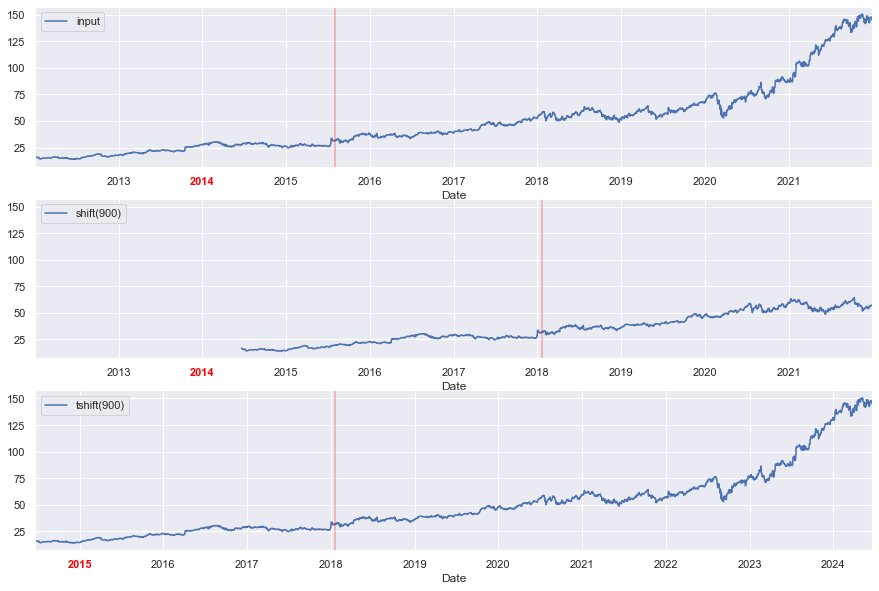

In [69]:
fig, ax = plt.subplots(3, sharey=True, figsize = (15,10))

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog['Close'].plot(ax=ax[0])
goog['Close'].shift(900).plot(ax=ax[1])
goog['Close'].tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2015-08-04')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

In [70]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2012-01-03,16.641375,16.248346,16.262545,16.573130,147611217.0,16.573130,2012
2012-01-04,16.693678,16.453827,16.563665,16.644611,114989399.0,16.644611,2012
2012-01-05,16.537264,16.344486,16.491436,16.413727,131808205.0,16.413727,2012
2012-01-06,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817,2012
2012-01-07,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817,2012


In [71]:
goog.shift(900).iloc[899:905]

,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,
2014-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-21,16.641375,16.248346,16.262545,16.573130,147611217.0,16.573130,2012.0
2014-06-22,16.693678,16.453827,16.563665,16.644611,114989399.0,16.644611,2012.0
2014-06-23,16.537264,16.344486,16.491436,16.413727,131808205.0,16.413727,2012.0
2014-06-24,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817,2012.0
2014-06-25,16.438385,16.184088,16.417213,16.189817,108119746.0,16.189817,2012.0


In [72]:
goog_900 = goog.shift(900)

In [ ]:
goog['Close'].plot()
goog_900['Close'].plot()